In [29]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
from IPython.display import Image, display
import os
import matplotlib

In [30]:
image_path = "/Users/leodidier/Documents/GitHub/basic_img_proc_op/images/radeau.jpg"

In [31]:
image = cv2.imread(image_path)

In [32]:
def plt_imshow (title, image):
    if len(image.shape) == 3:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
        image_rgb = image
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')
    plt.show()

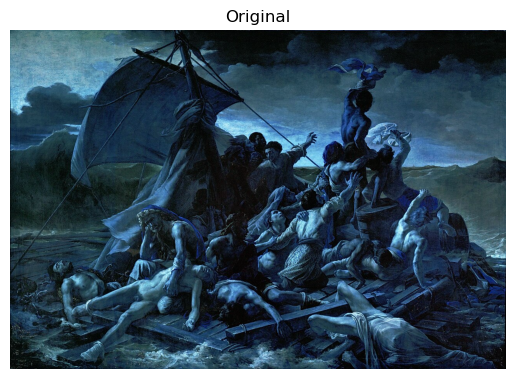

In [33]:
plt_imshow("Original", image)

# Application du filtre bilatéral

Cette cellule implémente une boucle qui va appliquer différents paramètres du filtre bilatéral sur l'image.

## Les paramètres utilisés

La variable `params` contient une liste de 4 combinaisons de paramètres sous forme de tuples:
- (11, 21, 7) 
- (11, 41, 21)
- (11, 61, 39)
- (21, 100, 100)

Pour chaque tuple:
- Le 1er nombre est le diamètre du voisinage (11 ou 21 pixels)
- Le 2ème nombre est sigma_x (filtrage spatial: 21, 41, 61 ou 100)  
- Le 3ème nombre est sigma_y (filtrage des intensités: 7, 21, 39 ou 100)

## Le traitement

À chaque itération:
1. Le filtre bilatéral est appliqué avec `cv2.bilateralFilter()` en utilisant les paramètres courants
2. L'image filtrée est stockée dans la variable `blurred`
3. Le résultat est affiché avec la fonction `plt_imshow()` et un titre indiquant les paramètres utilisés

## Impact des paramètres

- Un plus grand diamètre augmente la zone de calcul (plus lent)
- Un plus grand sigma_x augmente le lissage spatial
- Un plus grand sigma_y augmente le lissage des intensités

Plus les valeurs sont élevées, plus le lissage sera important. Cependant le filtre préserve les contours grâce à sa composante d'intensité.


In [ ]:
params = [(11, 21, 7), (11, 41, 21), (11, 61, 39), (21, 100, 100)] 

# Traitement d'image avec le filtre bilatéral

Cette cellule contient une boucle qui applique un filtre bilatéral sur l'image d'origine avec différents paramètres :

- La boucle itère sur une liste de tuples `params` qui contient 3 combinaisons de paramètres
- Pour chaque combinaison, nous avons :
  - `diameter` : Taille du voisinage considéré (ici 11 pixels)
  - `sigma_x` : Paramètre de filtrage dans le domaine spatial (21, 41 ou 61)
  - `sigma_y` : Paramètre de filtrage dans le domaine des intensités (7, 21 ou 39)

Le filtre bilatéral (`cv2.bilateralFilter()`) est appliqué à chaque itération avec ces paramètres. C'est un filtre de lissage qui préserve les bords, car il combine :
- Un filtrage spatial (basé sur la distance)
- Un filtrage d'intensité (basé sur la différence de couleur)

Pour chaque résultat :
- L'image filtrée est stockée dans la variable `blurred`
- Elle est affichée avec la fonction `plt_imshow()` 
- Le titre indique les paramètres utilisés pour ce filtrage


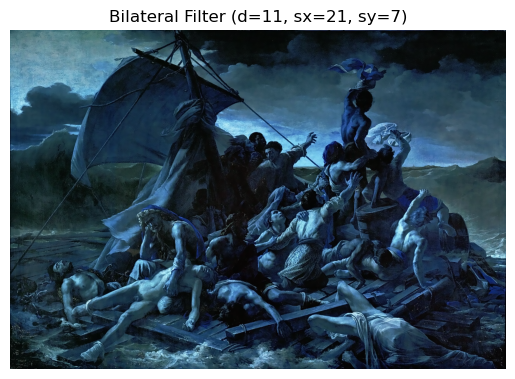

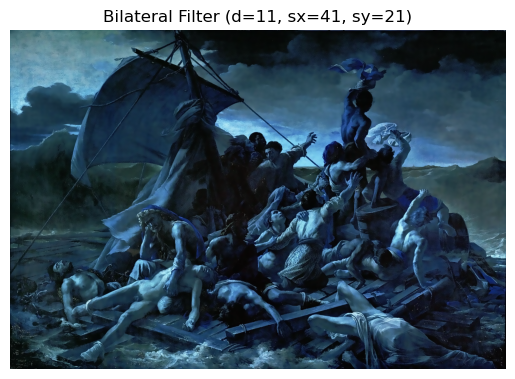

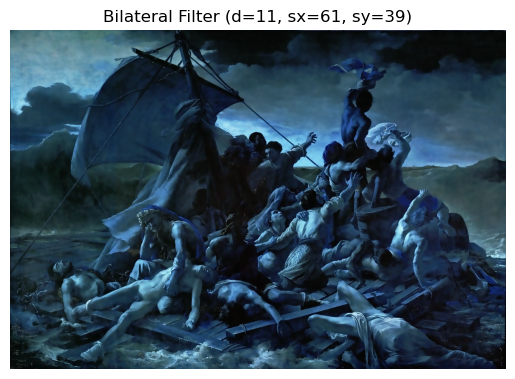

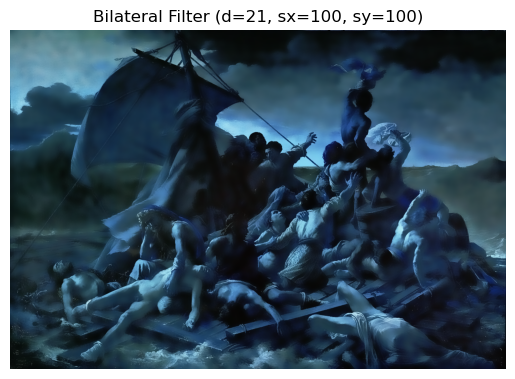

In [35]:
for (diamter, sigma_x, sigma_y) in params:
    blurred = cv2.bilateralFilter(image, diamter, sigma_x, sigma_y)
    plt_imshow(f"Bilateral Filter (d={diamter}, sx={sigma_x}, sy={sigma_y})", blurred)